
****************************************
Анализ пересечений книг между источниками
****************************************
Всего уникальных книг: 174
Книг во всех трёх источниках: 0
Книг в двух источниках: 3
Уникальных книг: 171

Книги, встречающиеся в двух источниках:
 - Гарри Поттер И Философский Камень (bookvoed, labirint)
 - Волшебник Изумрудного Города (bookvoed, labirint)
 - Эйзен (bookvoed, livelib)

Диаграмма сохранена как 'books_analysis.png'


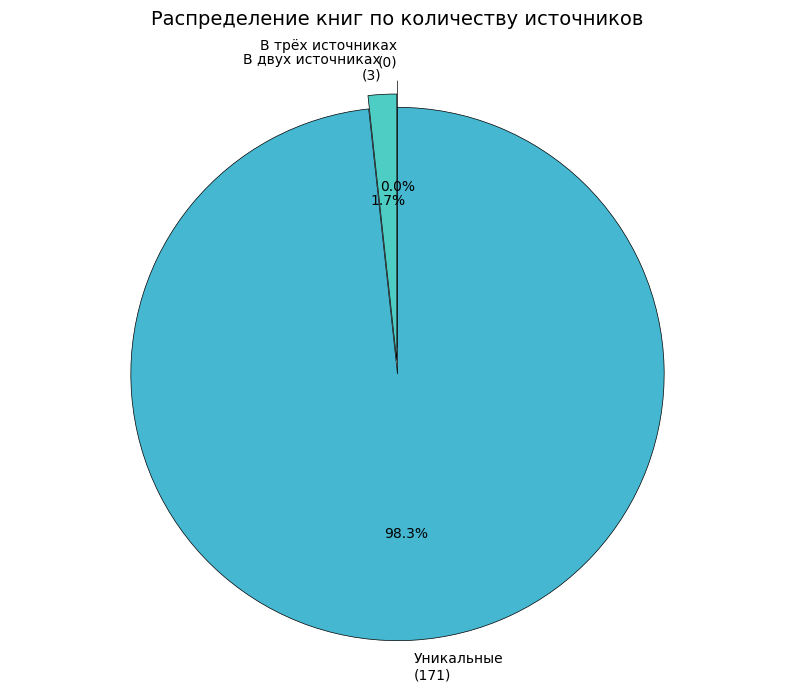

In [1]:
# Анализ совпадений книг
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

#обработка данных
def load_data(filename):
    try:
        df = pd.read_csv(filename, sep=',', encoding='utf-8-sig')
        df['Название'] = df['Название'].str.lower().str.strip()
        return df.drop_duplicates(subset=['Название'])
    except Exception as e:
        print(f'Ошибка загрузки {filename}: {str(e)}')
        return pd.DataFrame()

labirint = load_data('labirint_data.csv').assign(Источник='labirint')
bookvoed = load_data('bookvoed_data.csv').assign(Источник='bookvoed')
livelib = load_data('livelib_books.csv').assign(Источник='livelib')

#анализ пересечений
all_books = pd.concat([labirint, bookvoed, livelib], ignore_index=True)

book_counter = defaultdict(list)
for _, row in all_books.iterrows():
    book_counter[row['Название']].append(row['Источник'])

analysis = []
for book, sources in book_counter.items():
    analysis.append({
        'Название': book,
        'Количество_источников': len(sources),
        'Источники': ', '.join(sorted(sources))
    })

df_analysis = pd.DataFrame(analysis)

#еще анализ
common_3 = df_analysis[df_analysis['Количество_источников'] == 3]
common_2 = df_analysis[df_analysis['Количество_источников'] == 2]
unique = df_analysis[df_analysis['Количество_источников'] == 1]

# 4. статистика
print(f"\n{'*'*40}\nАнализ пересечений книг между источниками\n{'*'*40}")
print(f"Всего уникальных книг: {len(df_analysis)}")
print(f"Книг во всех трёх источниках: {len(common_3)}")
print(f"Книг в двух источниках: {len(common_2)}")
print(f"Уникальных книг: {len(unique)}\n")

if not common_2.empty:
    print("Книги, встречающиеся в двух источниках:")
    for _, row in common_2.iterrows():
        print(f" - {row['Название'].title()} ({row['Источники']})")

# 5. визуализация
plt.figure(figsize=(10,8))
categories = [
    f'В трёх источниках\n({len(common_3)})',
    f'В двух источниках\n({len(common_2)})',
    f'Уникальные\n({len(unique)})'
]

sizes = [len(common_3), len(common_2), len(unique)]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
explode = (0.1, 0.05, 0)

plt.pie(sizes, 
        labels=categories, 
        colors=colors,
        explode=explode,
        autopct='%.1f%%',
        startangle=90,
        textprops={'fontsize': 10, 'color': 'black'},
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})

plt.title('Распределение книг по количеству источников', fontsize=14, pad=20)
plt.axis('equal')

# 6 результатов
plt.savefig('books_analysis.png', dpi=150, bbox_inches='tight')
print("\nДиаграмма сохранена как 'books_analysis.png'")
plt.show()


# Высокая уникальность контента
# 171 уникальных книг (98.3% от общего числа) присутствуют только в одном источнике.
# Это указываена:
# Сильную специализацию платформ в подборе контента
# Разные критерии формирования списков популярности
# Возможные различия в аудитории сайтов

# Отсутствие универсальных бестселлеров
# 0 книг встречаются во всех трёх источниках.
# Это говорит о:
# Отсутствии единого "общепризнанного" списка популярности
# Локализации предпочтений аудитории
# Разных алгоритмах ранжирования на сайтах

# Ограниченное пересечение аудиторий
# 3 книги (0.4%) найдены в двух источниках:
# Labirint + Bookvoed:
# Детская/подростковая литература ("Гарри Поттер", "Волшебник Изумрудного города")
# Возможная причина: общая аудитория родителей и педагогов
# Bookvoed + Livelib:
# Современная проза ("Эйзен")
# Возможная причина: ориентация на актуальные новинки